In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import random
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.preprocessing import MinMaxScaler

In [2]:
num_rows = 500
num_stores = 5  # 5 different stores
num_products = 10  # 10 different products
customer_segments = ["Regular", "Premium", "New"]

data = []

for _ in range(num_rows):
    if random.random() < 0.1:
        date = None
    else:
        date = (datetime.now() - timedelta(days=random.randint(0, 30))).strftime("%Y-%m-%d")

    store_id = f"S{str(random.randint(1, num_stores)).zfill(3)}"

    if random.random() < 0.05:
        product_id = f"P{random.randint(1, 99)}"
    else:
        product_id = f"P{str(random.randint(1, num_products)).zfill(3)}"

    units_sold = np.random.randint(1, 100)

    if random.random() < 0.05:
        sales_amount = units_sold * np.random.uniform(200, 500)
    else:
        sales_amount = units_sold * np.random.uniform(10, 50)

    if random.random() < 0.1:
        discount_applied = None
    else:
        discount_applied = round(np.random.uniform(0, 15), 2)

    customer_segment = np.random.choice(customer_segments)

    data.append([date, store_id, product_id, units_sold, sales_amount, discount_applied, customer_segment])

df = pd.DataFrame(data, columns=["Date", "Store ID", "Product ID", "Units Sold", "Sales Amount", "Discount Applied", "Customer Segment"])

for i in range(int(len(df) * 0.03)):
    df.loc[random.randint(0, len(df) - 1), 'Date'] = 'invalid_date'

df.to_csv("sales_data_with_issues.csv", index=False)

In [3]:
df = pd.read_csv("sales_data_with_issues.csv")

# Step 1: Handle Missing Values
df = df.dropna(subset=['Date'])

# Filling missing discounts with 0, assuming no discount was applied if missing
df['Discount Applied'].fillna(0, inplace=True)

# Step 2: Correct Incorrect Formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Standardizig 'Product ID' format by ensuring all IDs follow "PXXX" format
df = df[df['Product ID'].str.match(r'^P\d{3}$', na=False)]

# Step 3: Handle Outliers
q_low = df["Sales Amount"].quantile(0.01)
q_high = df["Sales Amount"].quantile(0.99)
df["Sales Amount"] = np.where(df["Sales Amount"] < q_low, q_low, df["Sales Amount"])
df["Sales Amount"] = np.where(df["Sales Amount"] > q_high, q_high, df["Sales Amount"])

df.to_csv("sales_data_cleaned.csv", index=False)
print("sales_data_cleaned.csv has been created.")

sales_data_cleaned.csv has been created.


C:\Users\madhu\AppData\Local\Temp\ipykernel_3340\1143989130.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Applied'].fillna(0, inplace=True)


In [4]:
df.isnull().sum()

Date                0
Store ID            0
Product ID          0
Units Sold          0
Sales Amount        0
Discount Applied    0
Customer Segment    0
dtype: int64

In [5]:
# Aggregate total sales and average sales per product
total_sales = df.groupby('Product ID')['Sales Amount'].sum()
average_sales = df.groupby('Product ID')['Sales Amount'].mean()

# Finding the store with the highest sales performance
store_performance = df.groupby('Store ID')['Sales Amount'].sum()
top_store = store_performance.idxmax()
print(f"The store with the highest sales performance is: {top_store}")

# Analyzing the impact of discounts on sales amount
discount_impact = df.groupby('Discount Applied')['Sales Amount'].mean()

The store with the highest sales performance is: S004


In [6]:
# Total and average sales per product
print("Total Sales per Product:\n", total_sales)
print("Average Sales per Product:\n", average_sales)

# Impact of discounts on sales amount
print("Impact of Discounts on Sales Amount:\n", discount_impact)

Total Sales per Product:
 Product ID
P001     78247.874088
P002     98001.940481
P003    104199.322586
P004    116380.999303
P005     38964.763134
P006     78385.692428
P007     86851.008812
P008     48491.428520
P009    125149.607441
P010    117909.570006
Name: Sales Amount, dtype: float64
Average Sales per Product:
 Product ID
P001    2059.154581
P002    2882.410014
P003    2368.166422
P004    2375.122435
P005    1146.022445
P006    1781.493010
P007    2171.275220
P008    1426.218486
P009    2781.102388
P010    2183.510556
Name: Sales Amount, dtype: float64
Impact of Discounts on Sales Amount:
 Discount Applied
0.00     2005.775579
0.08     1215.233767
0.13     1536.161749
0.19      143.331965
0.21      822.918953
            ...     
14.79    2031.732731
14.84     676.998736
14.90     150.295168
14.91    1098.596152
14.92    2339.156819
Name: Sales Amount, Length: 333, dtype: float64


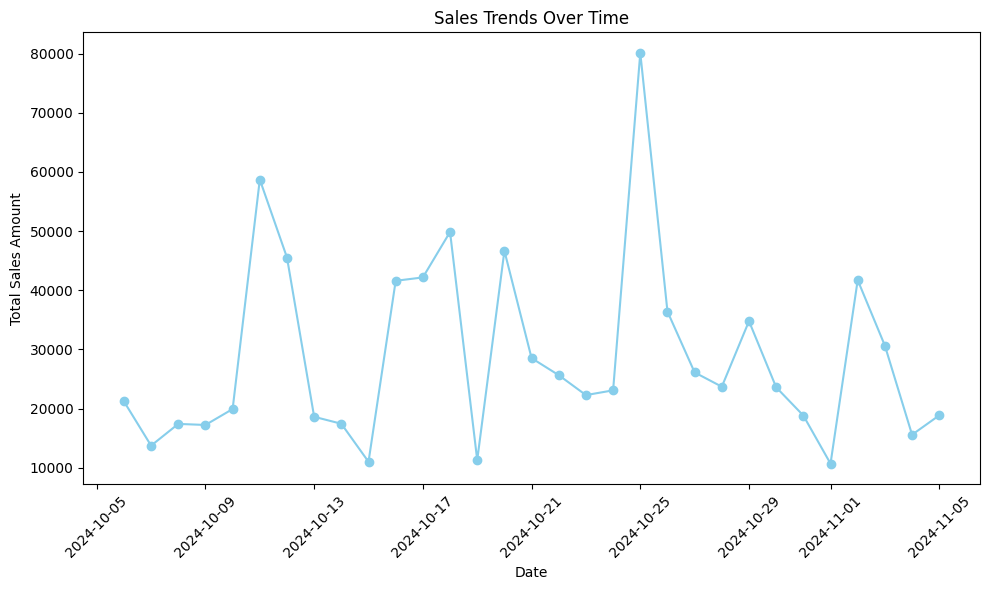

In [7]:
import matplotlib.pyplot as plt

# Sales trends over time
df_daily_sales = df.groupby('Date')['Sales Amount'].sum()
plt.figure(figsize=(10, 6))
plt.plot(df_daily_sales.index, df_daily_sales.values, marker='o', color='skyblue')
plt.title("Sales Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

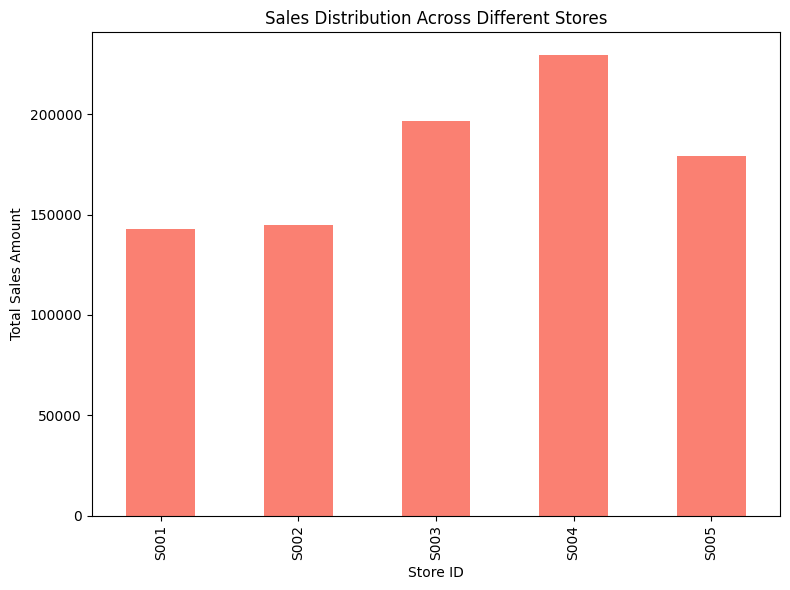

In [8]:
# Sales distribution across different stores
plt.figure(figsize=(8, 6))
store_performance.plot(kind='bar', color='salmon')
plt.title("Sales Distribution Across Different Stores")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()

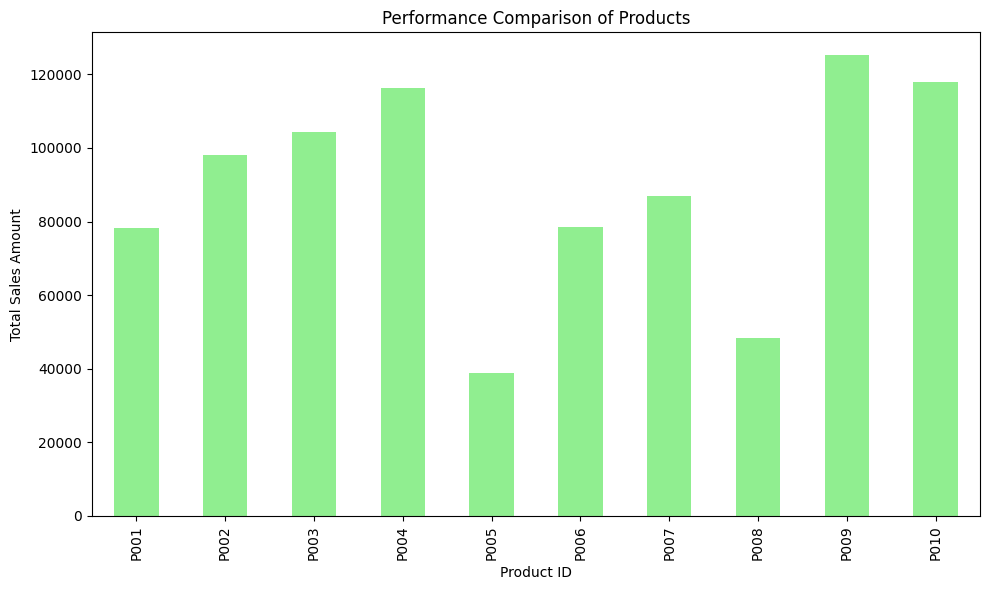

In [9]:
# Performance comparison of products
plt.figure(figsize=(10, 6))
total_sales.plot(kind='bar', color='lightgreen')
plt.title("Performance Comparison of Products")
plt.xlabel("Product ID")
plt.ylabel("Total Sales Amount")
plt.tight_layout()
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_3340\2962875649.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm, x='Customer Segment', y='Recency', palette='viridis')


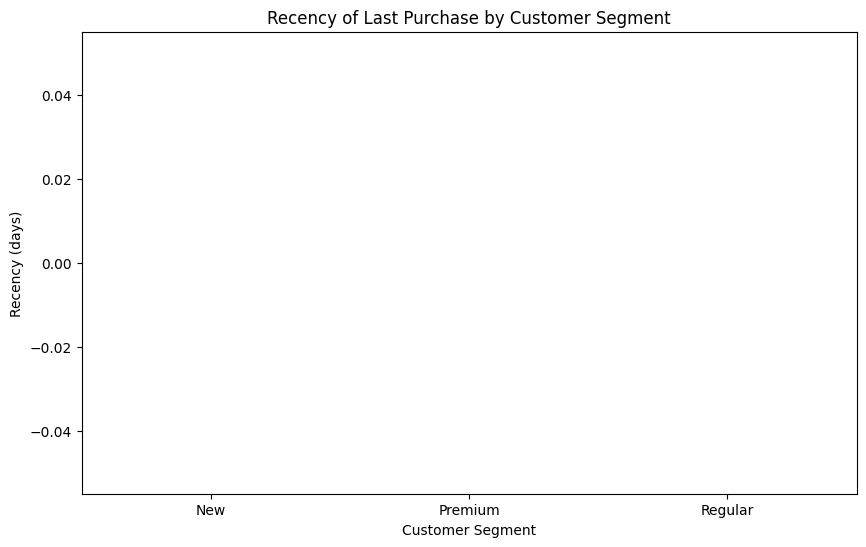

C:\Users\madhu\AppData\Local\Temp\ipykernel_3340\2962875649.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm, x='Customer Segment', y='Frequency', palette='viridis')


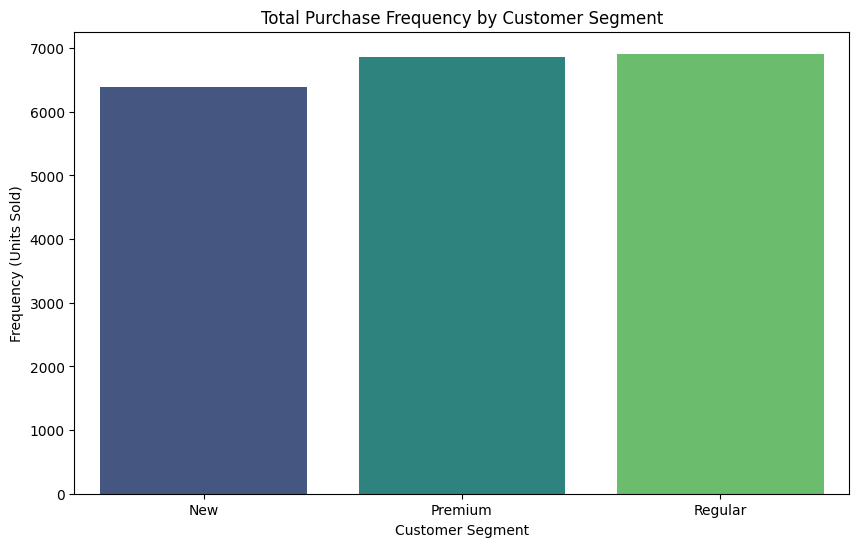

C:\Users\madhu\AppData\Local\Temp\ipykernel_3340\2962875649.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rfm, x='Customer Segment', y='Monetary', palette='viridis')


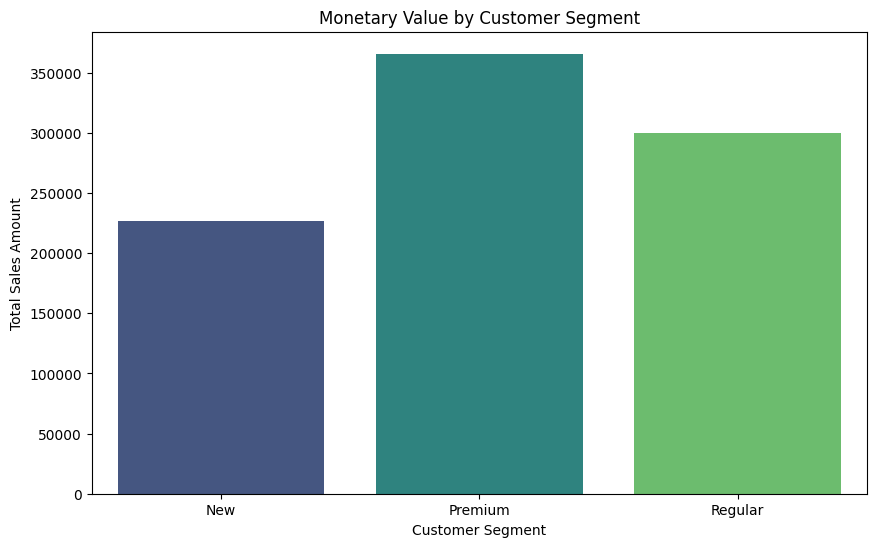

In [10]:
# Calculating Recency, Frequency, and Monetary (RFM) values for customer segments
rfm = df.groupby(['Customer Segment']).agg(
    Recency=('Date', lambda x: (df['Date'].max() - x.max()).days),
    Frequency=('Units Sold', 'sum'),
    Monetary=('Sales Amount', 'sum')
).reset_index()

# Plot RFM values
plt.figure(figsize=(10, 6))
sns.barplot(data=rfm, x='Customer Segment', y='Recency', palette='viridis')
plt.title("Recency of Last Purchase by Customer Segment")
plt.ylabel("Recency (days)")
plt.xlabel("Customer Segment")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=rfm, x='Customer Segment', y='Frequency', palette='viridis')
plt.title("Total Purchase Frequency by Customer Segment")
plt.ylabel("Frequency (Units Sold)")
plt.xlabel("Customer Segment")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=rfm, x='Customer Segment', y='Monetary', palette='viridis')
plt.title("Monetary Value by Customer Segment")
plt.ylabel("Total Sales Amount")
plt.xlabel("Customer Segment")
plt.show()

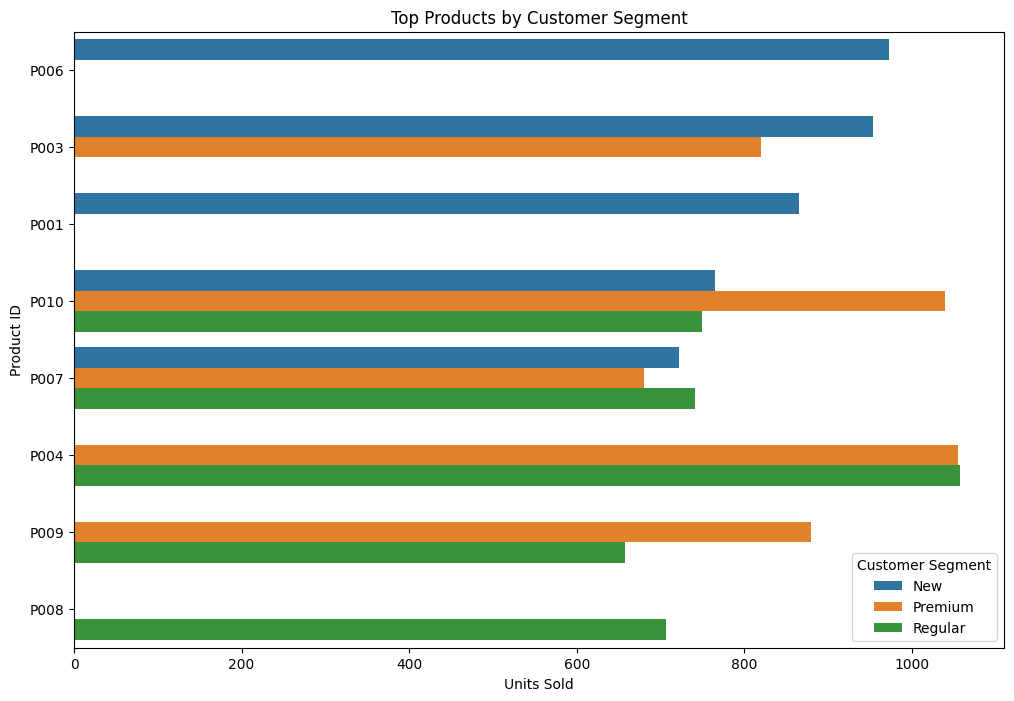

In [11]:
# Calculating top products per customer segment
top_products = df.groupby(['Customer Segment', 'Product ID'])['Units Sold'].sum().reset_index()
top_products = top_products.sort_values(['Customer Segment', 'Units Sold'], ascending=[True, False]).groupby('Customer Segment').head(5)

# Plotting top products per segment
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products, x='Units Sold', y='Product ID', hue='Customer Segment')
plt.title("Top Products by Customer Segment")
plt.xlabel("Units Sold")
plt.ylabel("Product ID")
plt.legend(title="Customer Segment")
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_3340\52689594.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=inventory_turnover, x='Product ID', y='Inventory Turnover', palette='coolwarm')


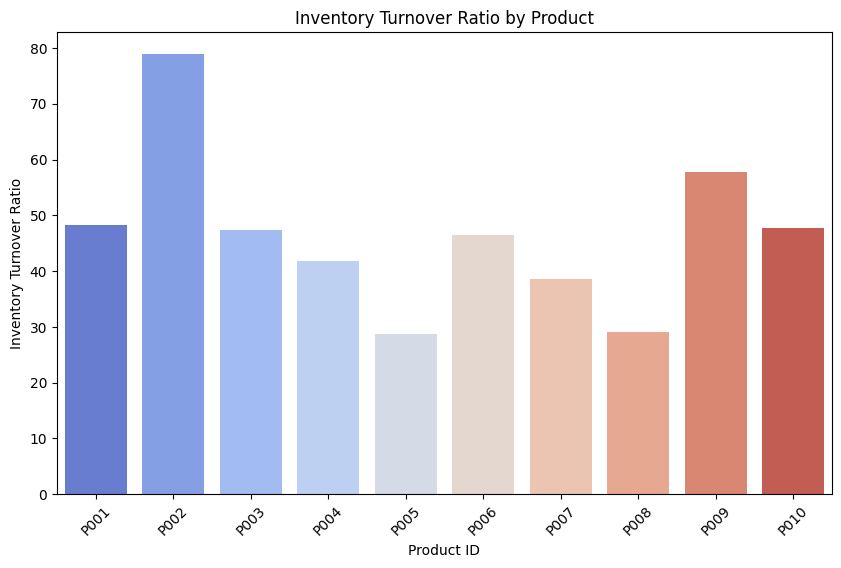

In [12]:
# Calculating inventory turnover ratio
df['Inventory Turnover'] = df['Sales Amount'] / df['Units Sold']
inventory_turnover = df.groupby('Product ID')['Inventory Turnover'].mean().reset_index()

# Plot inventory turnover ratio by product
plt.figure(figsize=(10, 6))
sns.barplot(data=inventory_turnover, x='Product ID', y='Inventory Turnover', palette='coolwarm')
plt.title("Inventory Turnover Ratio by Product")
plt.xlabel("Product ID")
plt.ylabel("Inventory Turnover Ratio")
plt.xticks(rotation=45)
plt.show()

C:\Users\madhu\AppData\Local\Temp\ipykernel_3340\3992875891.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Sales Amount'].sum()


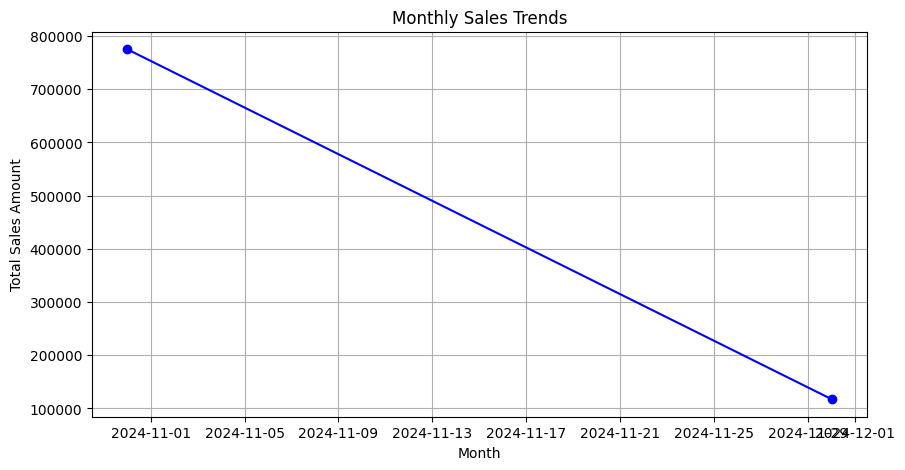

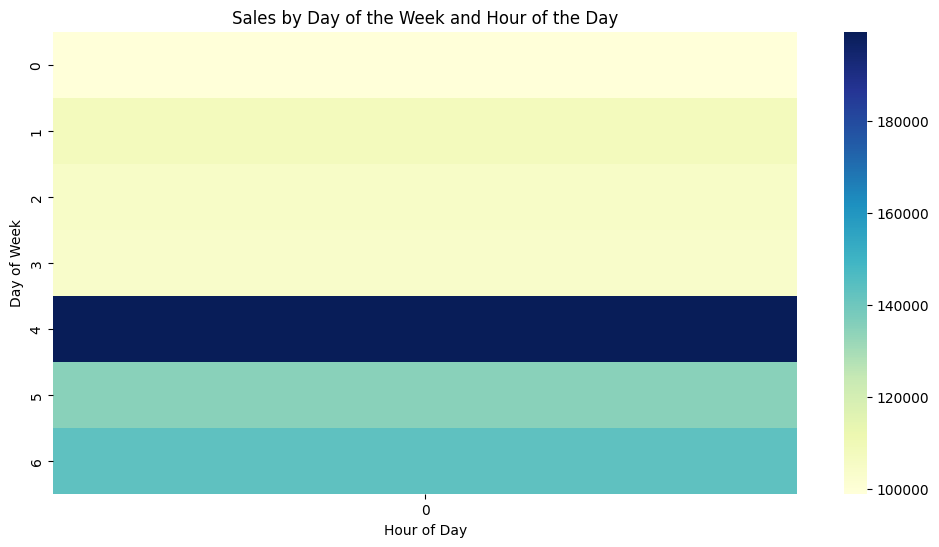

In [13]:
df = pd.read_csv("sales_data_cleaned.csv", parse_dates=['Date'])

# Resample sales data monthly and plot
monthly_sales = df.resample('M', on='Date')['Sales Amount'].sum()
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='b')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales Amount")
plt.grid(True)
plt.show()

# Heatmap for day-of-week and hour-of-day analysis
df['Day of Week'] = df['Date'].dt.dayofweek
df['Hour of Day'] = df['Date'].dt.hour
heatmap_data = df.pivot_table(values='Sales Amount', index='Day of Week', columns='Hour of Day', aggfunc='sum')
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False)
plt.title("Sales by Day of the Week and Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

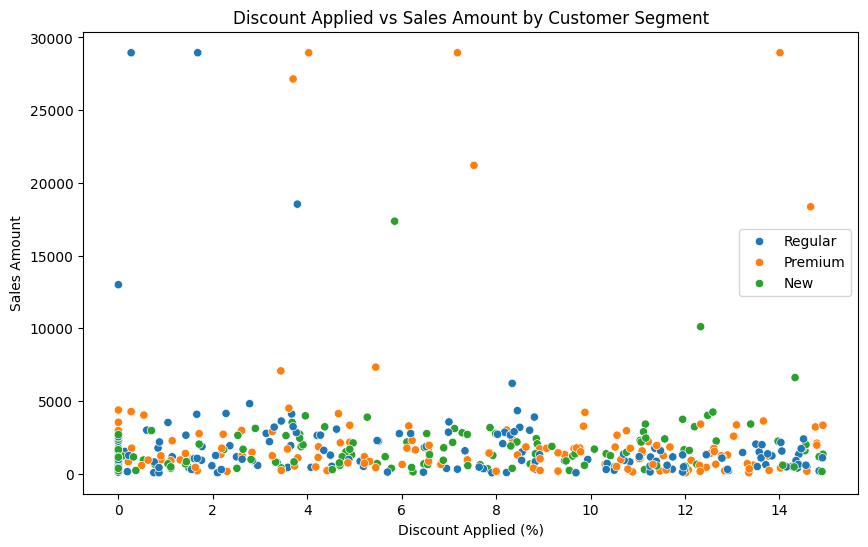

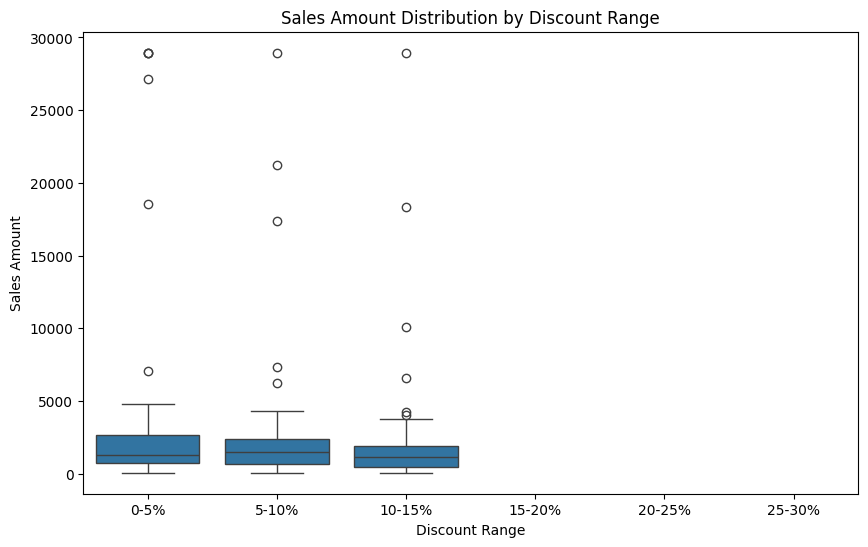

In [14]:
# Scatter plot to show Discount vs. Sales Amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount Applied', y='Sales Amount', hue='Customer Segment')
plt.title("Discount Applied vs Sales Amount by Customer Segment")
plt.xlabel("Discount Applied (%)")
plt.ylabel("Sales Amount")
plt.legend()
plt.show()

# Box plot for sales across discount ranges
df['Discount Range'] = pd.cut(df['Discount Applied'], bins=[0, 5, 10, 15, 20, 25, 30], labels=["0-5%", "5-10%", "10-15%", "15-20%", "20-25%", "25-30%"])
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Discount Range', y='Sales Amount')
plt.title("Sales Amount Distribution by Discount Range")
plt.xlabel("Discount Range")
plt.ylabel("Sales Amount")
plt.show()

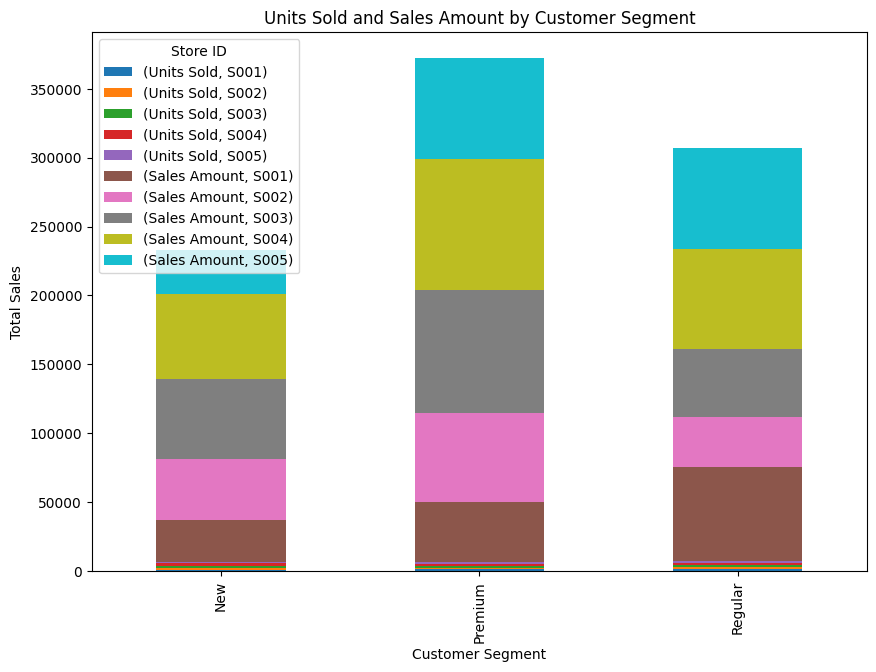

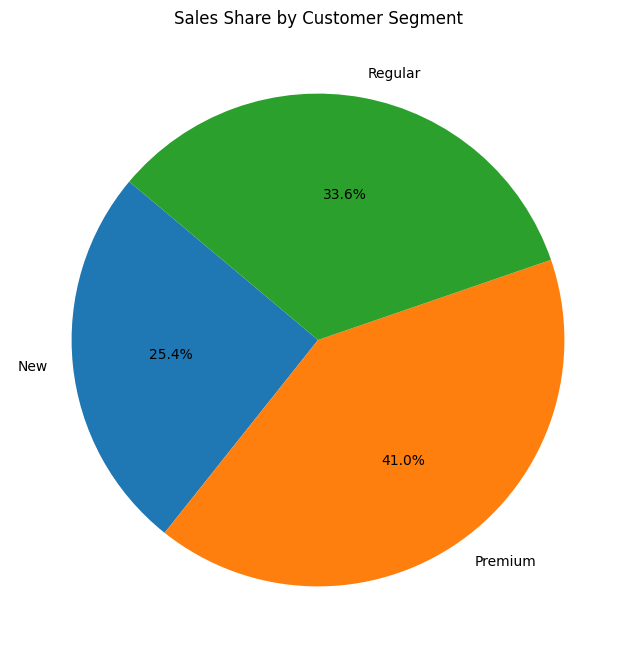

In [15]:
# Stacked bar chart for Units Sold and Sales Amount by Customer Segment
segment_sales = df.groupby(['Customer Segment', 'Store ID'])[['Units Sold', 'Sales Amount']].sum().unstack()
segment_sales.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title("Units Sold and Sales Amount by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales")
plt.legend(title="Store ID")
plt.show()

# Pie chart for sales share by customer segment
segment_sales_share = df.groupby('Customer Segment')['Sales Amount'].sum()
plt.figure(figsize=(8, 8))
plt.pie(segment_sales_share, labels=segment_sales_share.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Share by Customer Segment")
plt.show()

In [18]:
pip install --upgrade nbformat

In [21]:
# Radar chart comparing metrics across stores
store_metrics = df.groupby('Store ID')[['Sales Amount', 'Units Sold']].sum()
scaler = MinMaxScaler()
store_metrics_scaled = scaler.fit_transform(store_metrics)
store_metrics_scaled = pd.DataFrame(store_metrics_scaled, columns=store_metrics.columns, index=store_metrics.index)

# Radar chart setup
import plotly.express as px
fig = px.line_polar(store_metrics_scaled.reset_index(), r="Sales Amount", theta="Store ID", line_close=True)
fig.update_traces(fill='toself')
fig.show()